In [51]:
# import pandas and numpy libraries
import pandas as pd
import numpy as np

In [52]:
# read training and testing data from CSV files
training_set = pd.read_csv('./sign_mnist_train.csv')
testing_set = pd.read_csv('./sign_mnist_test.csv')

# extract the labels from the training and testing sets
y_train = training_set['label'].values
y_test = testing_set['label'].values

# remove the labels from the feature sets
training_set.drop('label', axis=1, inplace=True)
testing_set.drop('label', axis=1, inplace=True)

# print the first few rows of the testing set to verify that it was loaded correctly
testing_set.head()


FileNotFoundError: [Errno 2] No such file or directory: './sign_mnist_train.csv'

In [ ]:
# extract the features from the training and testing sets
x_train = training_set.values
x_test = testing_set.values

# create an array of unique labels in the training set
unique_val = np.array(y_train)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
# reshape the feature sets to match the required format for the model
x_train = np.array(x_train.reshape(-1, 28, 28, 1))
x_test = np.array(x_test.reshape(-1, 28, 28, 1))

In [ ]:
# import LabelBinarizer from sklearn.preprocessing
from sklearn.preprocessing import LabelBinarizer

# create a LabelBinarizer object for the training and testing label sets
label_train = LabelBinarizer()
label_test = LabelBinarizer()

# transform the training and testing labels using the LabelBinarizer objects
y_train = label_train.fit_transform(y_train)
y_test = label_test.fit_transform(y_test)

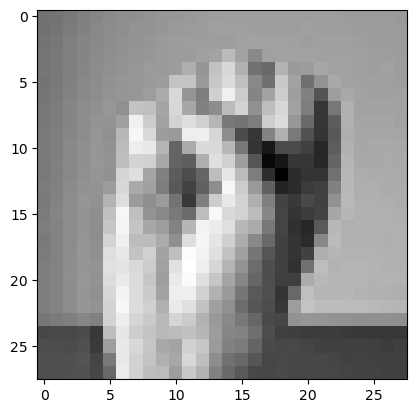

In [ ]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# display an example image from the training set
plt.imshow(x_train[10].reshape(28, 28), cmap='gray')

In [ ]:
# scale the feature sets by dividing by the maximum pixel value (255)
x_train = x_train / 255
x_test = x_test / 255

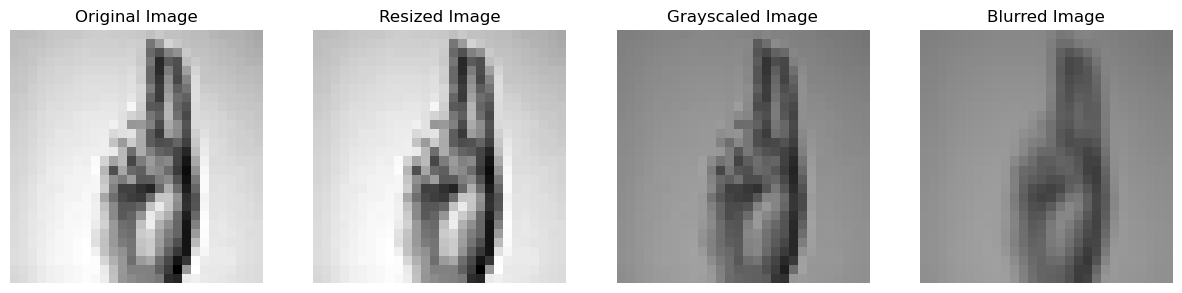

In [ ]:
import cv2
from matplotlib import pyplot as plt

def visualize_preprocessing_steps(image_index):
    # Get the original image
    original_image = x_train[image_index].reshape(28, 28) * 255
    original_image = original_image.astype(np.uint8)

    # Resize the image
    resized_image = cv2.resize(original_image, (28, 28))

    # Grayscale the image
    grayscaled_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(grayscaled_image, (3, 3), 0)

    # Plot the images
    fig, axes = plt.subplots(1, 4, figsize=(15, 15))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')

    axes[1].imshow(resized_image, cmap='gray')
    axes[1].set_title('Resized Image')

    axes[2].imshow(grayscaled_image, cmap='gray')
    axes[2].set_title('Grayscaled Image')

    axes[3].imshow(blurred_image, cmap='gray')
    axes[3].set_title('Blurred Image')

    for ax in axes:
        ax.axis('off')

    plt.show()

# Call the function with an example image index
visualize_preprocessing_steps(14)


# training


In [ ]:
# import the keras library
import keras

# import the necessary modules from keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


2023-04-23 23:54:08.584230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# set the batch size for training
batch_size = 128

# set the number of classes in the dataset
num_classes = 24

# set the number of epochs for training
epochs = 100

In [ ]:
# create a Sequential model object
model = Sequential()

# add a convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation
# input_shape specifies the size of the input images
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# add another convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# add a dropout layer with a rate of 0.20
model.add(Dropout(0.20))

# add another convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# add another dropout layer with a rate of 0.20
model.add(Dropout(0.20))

# flatten the output from the previous layer into a 1D vector
model.add(Flatten())

# add a dense layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# add another dropout layer with a rate of 0.20
model.add(Dropout(0.20))

# add a final dense layer with 'num_classes' units and 'softmax' activation
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [44]:
import pandas as pd

def visualize_model(model):
    layers_info = []

    for i, layer in enumerate(model.layers):
        layer_info = {
            'Layer': i + 1,
            'Layer Type': layer.__class__.__name__,
            'Output Shape': layer.output_shape
        }
        layers_info.append(layer_info)

    df = pd.DataFrame(layers_info)
    return df

model = keras.models.load_model("sign_language")
architecture_table = visualize_model(model)
print(architecture_table)


    Layer    Layer Type        Output Shape
0       1        Conv2D  (None, 26, 26, 64)
1       2  MaxPooling2D  (None, 13, 13, 64)
2       3        Conv2D  (None, 11, 11, 64)
3       4  MaxPooling2D    (None, 5, 5, 64)
4       5       Dropout    (None, 5, 5, 64)
5       6        Conv2D    (None, 3, 3, 64)
6       7  MaxPooling2D    (None, 1, 1, 64)
7       8       Dropout    (None, 1, 1, 64)
8       9       Flatten          (None, 64)
9      10         Dense         (None, 128)
10     11       Dropout         (None, 128)
11     12         Dense          (None, 24)


In [ ]:
# train the model using the training data and validation data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/100
215/215 [==============================] - 43s 191ms/step - loss: 2.5509 - accuracy: 0.2078 - val_loss: 1.4404 - val_accuracy: 0.5718
Epoch 2/100
215/215 [==============================] - 33s 156ms/step - loss: 1.2282 - accuracy: 0.5823 - val_loss: 0.8184 - val_accuracy: 0.7464
Epoch 3/100
215/215 [==============================] - 30s 138ms/step - loss: 0.7861 - accuracy: 0.7321 - val_loss: 0.5681 - val_accuracy: 0.8065
Epoch 4/100
215/215 [==============================] - 29s 135ms/step - loss: 0.5741 - accuracy: 0.8049 - val_loss: 0.4740 - val_accuracy: 0.8405
Epoch 5/100
215/215 [==============================] - 29s 134ms/step - loss: 0.4418 - accuracy: 0.8491 - val_loss: 0.3724 - val_accuracy: 0.8685
Epoch 6/100
215/215 [==============================] - 29s 133ms/step - loss: 0.3506 - accuracy: 0.8826 - val_loss: 0.3297 - val_accuracy: 0.8925
Epoch 7/100
215/215 [==============================] - 31s 145ms/step - loss: 0.2863 - accuracy: 0.9037 - val_loss: 0.3016 -

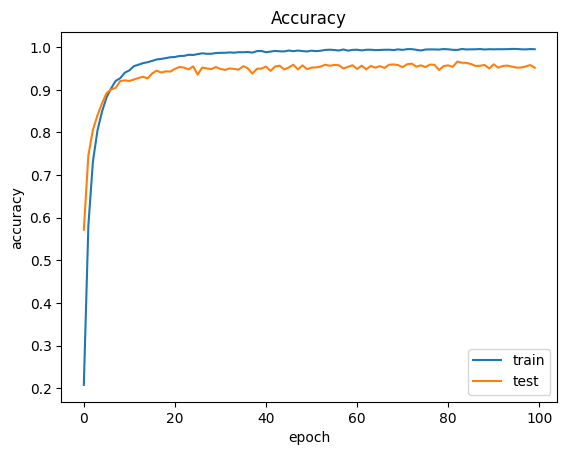

In [ ]:
# plot the training and testing accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# save the trained model to a file
model.save('sign_language')